In [31]:
import json
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [77]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

In [39]:
def make_it_pretty():
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')      

In [53]:
# Combined all the csv files, no need to redo because a pickle of a dataframe is included
fps = ["articles1.csv", "articles2.csv", "articles3.csv"]
allthenews = "C:/Users/forresthooton/Downloads/"


atn = pd.DataFrame()

for fp in fps:
    atn = pd.concat([atn, pd.read_csv(allthenews+fp)], axis = 0, ignore_index = True)

atn = atn.drop('Unnamed: 0', axis=1).reset_index(drop=True)

In [55]:
# This was to combine the file origionally, no need to redo
#atn.to_pickle('all_the_news.pkl')

In [107]:
atn

,id,title,publication,author,date,year,month,url,content,text_length
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,884
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",4770
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",2389
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",2119
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",694
5,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b...",159
6,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...,571
7,17290,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,Gina Kolata,2017-02-08,2017.0,2.0,NaN,"Danny Cahill stood, slightly dazed, in a blizz...",3194
8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ...",1610
9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...,818


In [21]:
print('# of authors in all the news', len(atn.author.drop_duplicates()))

# of authors in all the news 3604


In [56]:
atn.year.drop_duplicates()

0         2016.0
1         2017.0
2532      2014.0
5631      2015.0
17077     2013.0
32077     2012.0
38656     2011.0
57140        NaN
57718     2004.0
61607     2008.0
62169     2003.0
62954     2007.0
71798     2005.0
96092     2010.0
97035     2009.0
105029    2000.0
Name: year, dtype: float64

In [57]:
atn.columns

Index(['id', 'title', 'publication', 'author', 'date', 'year', 'month', 'url',
       'content'],
      dtype='object')

In [58]:
# % title lengths unique
len(atn.title.drop_duplicates()) / len(atn.title)

0.9969348390264432

In [59]:
atn['text_length'] = atn.content.str.split().apply(len)

In [60]:
print(atn.text_length.mean())
print(atn.text_length.median())

741.4551027565407
592.0


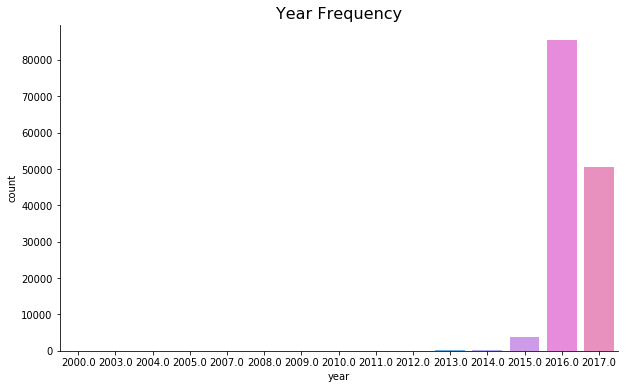

In [65]:
plt.subplots(figsize=(10,6))
ax = sns.countplot(atn.year)
ax.set_title('Year Frequency', fontsize = 16)
make_it_pretty()

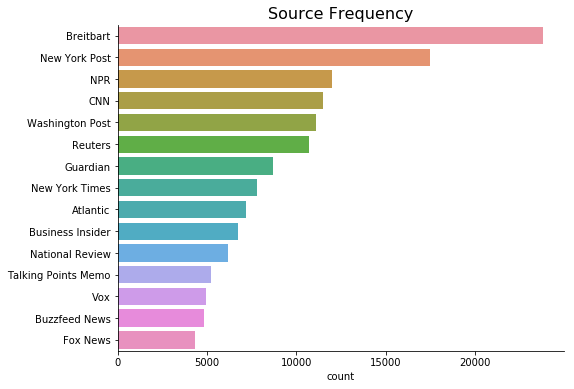

In [76]:
plt.subplots(figsize=(8,6))
viz_data = atn.publication.value_counts()
ax = sns.barplot(y = viz_data.index, x = viz_data, orient='h')
ax.set_title('Source Frequency', fontsize = 16)
ax.set_xlabel('count')
make_it_pretty()

In [102]:
for i in range(15):
    print(atn.content[i])
    print()

WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been d

After the bullet shells get counted, the blood dries and the votive candles burn out, people peer down from   windows and see crime scenes gone cold: a band of yellow police tape blowing in the breeze. The South Bronx, just across the Harlem River from Manhattan and once shorthand for urban dysfunction, still suffers violence at levels long ago slashed in many other parts of New York City. And yet the city’s efforts to fight it remain splintered, underfunded and burdened by scandal. In the 40th Precinct, at the southern tip of the Bronx, as in other poor, minority neighborhoods across the country, people long hounded for   infractions are crying out for more protection against grievous injury or death. By September, four of every five shootings in the precinct this year were unsolved. Out of the city’s 77 precincts, the 40th has the highest murder rate but the fewest detectives per violent crime, reflecting disparities in staffing that hit hardest in some neighborhoods outside Manhatta

When Walt Disney’s “Bambi” opened in 1942, critics praised its spare, haunting visual style, vastly different from anything Disney had done before. But what they did not know was that the film’s striking appearance had been created by a Chinese immigrant artist, who took as his inspiration the landscape paintings of the Song dynasty. The extent of his contribution to “Bambi,” which remains a   mark for film animation, would not be widely known for decades. Like the film’s title character, the artist, Tyrus Wong, weathered irrevocable separation from his mother  —   and, in the hope of making a life in America, incarceration, isolation and rigorous interrogation  —   all when he was still a child. In the years that followed, he endured poverty, discrimination and chronic lack of recognition, not only for his work at Disney but also for his fine art, before finding acclaim in his 90s. Mr. Wong died on Friday at 106. A Hollywood studio artist, painter, printmaker, calligrapher,   illustra

Death may be the great equalizer, but it isn’t necessarily evenhanded. Of all the fields of endeavor that suffered mortal losses in 2016  —   consider Muhammad Ali and Arnold Palmer in sports and the      Hollywood deaths of Carrie Fisher and Debbie Reynolds  —   the pop music world had, hands down, the bleakest year. Start with David Bowie, whose stage persona  —   androgynous glam rocker, dance pop star, electronic experimentalist  —   was as   as his music. The year was only days old when the news came that he had died of cancer at 69. He had hinted that his time was short in the lyrics of his final album, released just two days before his death, but he had otherwise gone to great lengths to hide his illness from the public, a wish for privacy that ensured that his death would appear to have come out of the blue. Then came another shock, about three months later, when Prince accidentally overdosed on a painkiller and collapsed in an elevator at his sprawling home studio near Minneap


SEOUL, South Korea  —   North Korea’s leader, Kim   said on Sunday that his country was making final preparations to conduct its first test of an intercontinental ballistic missile  —   a bold statement less than a month before the inauguration of   Donald J. Trump. Although North Korea has conducted five nuclear tests in the last decade and more than 20 ballistic missile tests in 2016 alone, and although it habitually threatens to attack the United States with nuclear weapons, the country has never   an intercontinental ballistic missile, or ICBM. In his annual New Year’s Day speech, which was broadcast on the North’s   KCTV on Sunday, Mr. Kim spoke proudly of the strides he said his country had made in its nuclear weapons and ballistic missile programs. He said North Korea would continue to bolster its weapons programs as long as the United States remained hostile and continued its joint military exercises with South Korea. “We have reached the final stage in preparations to   an in

BEIJING  —   President Tsai   of Taiwan sharply criticized China’s leaders on Saturday, saying they had resorted to military and economic threats in order to intimidate the island. “Step by step, Beijing is going back to the old path of dividing, coercing and even threatening and intimidating Taiwan,” she told journalists in Taipei, the capital, at a   news conference. Tensions between Taiwan and China, which have been rivals since the Communist Revolution of 1949, intensified in December after Ms. Tsai spoke on the phone with the American   Donald J. Trump, breaking a longstanding diplomatic practice. In recent weeks, China has stepped up military activities near Taiwan, sending its sole aircraft carrier through the waters near the island and dispatching military planes in the region. On Monday, Beijing announced that São Tomé and Príncipe, an island nation off the west coast of Africa that was one of Taiwan’s fewer than two dozen remaining diplomatic allies, had switched its allegian

Danny Cahill stood, slightly dazed, in a blizzard of confetti as the audience screamed and his family ran on stage. He had won Season 8 of NBC’s reality television show “The Biggest Loser,” shedding more weight than anyone ever had on the program  —   an astonishing 239 pounds in seven months. When he got on the scale for all to see that evening, Dec. 8, 2009, he weighed just 191 pounds, down from 430. Dressed in a   and   shorts, he was lean, athletic and as handsome as a model. “I’ve got my life back,” he declared. “I mean, I feel like a million bucks. ” Mr. Cahill left the show’s stage in Hollywood and flew directly to New York to start a triumphal tour of the talk shows, chatting with Jay Leno, Regis Philbin and Joy Behar. As he heard from fans all over the world, his elation knew no bounds. But in the years since, more than 100 pounds have crept back onto his    frame despite his best efforts. In fact, most of that season’s 16 contestants have regained much if not all the weight t

Just how   is Hillary Kerr, the    founder of a   digital media company in Los Angeles? She can tell you what song was playing five years ago on the jukebox at the bar where she somewhat randomly met the man who became her husband. It was “These Days,” the version sung by Nico, the German   made famous by Andy Warhol and the Velvet Underground. Actually, the song had been playing just before she met Jonathan Leahy, now 38, on that December night in 2011 at the 4100 Bar in the Silver Lake district of Los Angeles. Ms. Kerr can’t remember exactly what was playing when they met because at that moment she was jumping up and down “like Tigger,” as she put it. In answering the usual     questions, Mr. Leahy told her he was a music supervisor for “Girls,” the HBO show created by and starring Lena Dunham. That was enough to get Ms. Kerr bouncing. “Your music has changed my life!” she told Mr. Leahy. Mr. Leahy, who is quiet but not shy (at least he doesn’t jump up and down upon meeting people) w


Angels are everywhere in the Muñiz family’s apartment in the Bronx: paintings of angels on the wall, ceramic angels flanking the ancient VCR, angels strumming lyres or blowing little golden trumpets on the bathroom shelves. As José and Zoraida Muñiz and their children have struggled to deal with a   series of trials and setbacks, including cancer, debilitating epilepsy, deep depression and near eviction, it has sometimes seemed as if angels and love were the only forces holding things together. Zoraida’s early life in Puerto Rico was like something from a tropical Dickens novel. She and her siblings and mother built a house by hand after a hurricane ravaged their home and the children’s father withdrew support. Then Zoraida’s grandfather  —   the father of her absent father  —   destroyed the house in a rage. She was barely a teenager when she met José, a Vietnam War veteran. With permission from her uncle, a judge, they were married. She was 14. He was 29. They moved to New York in 1

With Donald J. Trump about to take control of the White House, it would seem a dark time for the renewable energy industry. After all, Mr. Trump has mocked the science of global warming as a Chinese hoax, threatened to kill a global deal on climate change and promised to restore the coal industry to its former glory. So consider what happened in the middle of December, after investors had had a month to absorb the implications of Mr. Trump’s victory. The federal government opened bidding on a tract of the ocean floor off New York State as a potential site for a huge wind farm. Up, up and away soared the offers  —   interest from the bidders was so fevered that the auction went through 33 rounds and spilled over to a second day. In the end, the winning bidder offered the federal Treasury $42 million, more than twice what the government got in August for oil leases  —   oil leases  —   in the Gulf of Mexico. Who won the bid? None other than Statoil, the Norwegian oil company, which is in

THOMPSONS, Tex.  —   Can one of the most promising  —   and troubled  —   technologies for fighting global warming survive during the administration of Donald J. Trump? The technology, carbon capture, involves pulling carbon dioxide out of smokestacks and industrial processes before the   gas can make its way into the atmosphere. Mr. Trump’s denial of the overwhelming scientific evidence supporting climate change, a view shared by many of his cabinet nominees, might appear to doom any such environmental initiatives. But the new Petra Nova plant about to start running here, about 30 miles southwest of Houston, is a bright spot for the technology’s supporters. It is being completed essentially on time and within its budget, unlike many previous such projects. When it fires up, the plant, which is attached to one of the power company NRG’s hulking   units, will draw 90 percent of the CO2 from the emissions produced by 240 megawatts of generated power. That is a fraction of the roughly 3, 


WEST PALM BEACH, Fla.  —   When   Donald J. Trump rang in the new year this weekend, he did it in   opulence, joined by the actor Sylvester Stallone, the gossip page fixture Fabio and a crowd of wealthy developers reveling under the swaying palm trees at Mr. Trump’s    resort in Palm Beach. President George W. Bush had his ranch in Crawford, Tex. His father had a compound in Kennebunkport, Me. President Obama has taken frequent vacations in Hawaii, staying at a private home. But Mr. Trump’s   private club in Florida, where he has spent the past two weeks away from his home in New York City, is likely to eclipse them all as the 45th president’s winter White House. And that was always the intention of Marjorie Meriweather Post, the cereal heiress and the property’s original owner, who left    to the federal government when she died in 1973, hoping it would serve as a home for presidents. But the government had no interest in her plan, and Mr. Trump later bought the property for less tha

This article is part of a series aimed at helping you navigate life’s opportunities and challenges. What else should we write about? Contact us: smarterliving@nytimes. com. When you woke up this morning, what did you do first? Did you hop in the shower, check your email or grab a doughnut? What did you say to your roommates on the way out the door? Salad or hamburger for lunch? When you got home, did you put on your sneakers and go for a run, or eat dinner in front of the television? Most of the choices we make each day may feel like the products of   decision making, but they’re not. They’re habits. And though each habit means relatively little on its own, over time, the meals we eat, how we spend our evenings, and how often we exercise have enormous impacts. This is particularly true in our 20s, when so many of our habits are still up for grabs. The patterns you establish right now will impact your health, productivity, financial security and happiness for decades. How much money you

It’s the season for family travel and photos  —   and perhaps enlarging some of those images of snowy landscapes or tropical getaways to decorate your home. There are, of course, the usual print services and methods. You can choose a glossy or matte finish, print a photo on canvas, or make it into a poster with a few clicks online at photo sites like Snapfish and Shutterfly, professional photo shops like Adorama and Mpix, or drugstores and   chains like Walgreens and Costco. But the web is also home to many   printing services, as well as uncommon surfaces on which to enlarge photos for display, be it burlap, wood boards, acrylic or    fabric. Why not try some fresh sites and methods? I recently sent some   quality iPhone vacation photos to a handful of companies that I’d never used before and had them enlarged to various sizes and printed on different surfaces. I’ve also offered some guidance about bulk digitizing those boxes of old travel photos sitting in your closet or basement so 

In [100]:
doc1 = nlp(atn.content[0])
doc2 = nlp(atn.content[1])

In [101]:
doc1.similarity(doc2)

0.9648222599715472

In [104]:
atn['nlp_text'] = atn.content.apply(nlp)

KeyboardInterrupt: 

In [ ]:
sim_thresh = .97

edge_list = pd.DataFrame()

for idx, row in atn.iterrows():
    for idx2, row2 in atn.iterrows():
        doc1 = nlp(atn.content[0])
        doc2 = nlp(atn.content[1])

In [105]:
atn

,id,title,publication,author,date,year,month,url,content,text_length
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,884
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",4770
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",2389
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",2119
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",694
5,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b...",159
6,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...,571
7,17290,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,Gina Kolata,2017-02-08,2017.0,2.0,NaN,"Danny Cahill stood, slightly dazed, in a blizz...",3194
8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ...",1610
9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...,818
